In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats #確率分布を扱うライブラリ

## トレードデータの取得

In [2]:
EURUSD = pd.read_csv('D:\MixBollinger\EURUSD_220710~/MixBollinger_EURUSD.csv')

In [3]:
EURUSD.head()

,SystemDate,Date,DST,Week,OpenTime,CloseTime,OpenPrice,ClosePrice,Type,Profit,MaxProfit,Rate,MaxMinTime,LosCut,Spread,OpenTime(2),CenterTime
0,2010.01.04 10:36,2010.01.04,N,1,10:36,16:19,1.43799,1.44043,0,24.4,69.9,34.9,280,47.213813,1.4,2010/1/4 10:36,2010/1/5 9:04
1,2010.01.05 05:25,2010.01.05,N,2,5:25,9:02,1.44281,1.44404,0,12.3,54.9,22.4,156,14.173674,1.6,2010/1/5 5:25,2010/1/5 9:04
2,2010.01.05 12:05,2010.01.05,N,2,12:05,12:39,1.44097,1.44244,1,-14.7,8.8,-167.0,19,14.771980,1.3,2010/1/5 12:05,2010/1/5 12:39
3,2010.01.05 13:42,2010.01.05,N,2,13:42,14:38,1.44398,1.44258,0,-14.0,14.2,-98.6,5,14.891786,1.4,2010/1/5 13:42,2010/1/5 14:38
4,2010.01.05 15:01,2010.01.05,N,2,15:01,15:14,1.44108,1.44260,1,-15.2,3.6,-422.2,3,15.116385,1.3,2010/1/5 15:01,2010/1/5 15:14


In [4]:
EURUSD.dtypes

SystemDate      object
Date            object
DST             object
Week             int64
OpenTime        object
CloseTime       object
OpenPrice      float64
ClosePrice     float64
Type             int64
Profit         float64
MaxProfit      float64
Rate           float64
MaxMinTime       int64
LosCut         float64
Spread         float64
OpenTime(2)     object
CenterTime      object
dtype: object

## 相場タイプの取得

In [5]:
EURUSD_type = pd.read_excel('D:/07相場情報/相場情報_EURUSD.xlsx', sheet_name="分析", header=1, usecols="c:D,N:Q")


In [6]:
EURUSD_type.head()

,Date,Week,BeforeType,ExpansionType,AfterType,ExpnLineage
0,2010.01.01,Fri,NaN,NaN,NaN,-
1,2010.01.04,Mon,range,expansion,squeeze,expansion
2,2010.01.05,Tue,squeeze,fake inverse expn,squeeze,expansion
3,2010.01.06,Wed,squeeze,expansion,range,expansion
4,2010.01.07,Thu,range,expansion,squeeze,expansion


In [7]:
EURUSD_type.dtypes

Date             object
Week             object
BeforeType       object
ExpansionType    object
AfterType        object
ExpnLineage      object
dtype: object

## 休日・祝日データ

## 分析データをまとめる

In [8]:
# 日付ごとに集計するための日付リストを作成

# 使用するモジュールのインポート
from datetime import datetime as dt
from datetime import timedelta

# 日付条件の設定
strdt = dt.strptime("2010-01-01 3:00", '%Y-%m-%d %H:%M')  # 開始日
enddt = dt.strptime("2022-07-8 3:00", '%Y-%m-%d %H:%M')  # 終了日

# 日付差の日数を算出（リストに最終日も含めたいので、＋１しています）
days_num = (enddt - strdt).days + 1  # （参考）括弧の部分はtimedelta型のオブジェクトになります

# シンプルにforとappendを使用した場合
analysdata = []
for i in range(days_num):
    dayStart = strdt + timedelta(days=i)

    if dayStart.strftime("%a") == 'Sat' or dayStart.strftime("%a") == 'Sun':      
        continue
    elif dayStart.strftime("%a") == 'Fri':
        dayEnd = strdt + timedelta(days=i+3)
    else: dayEnd = strdt + timedelta(days=i+1)
    
    dateinfo = []
    
    #日付,曜日
    dateinfo.append(dayStart.strftime("%Y.%m.%d"))
    dateinfo.append(dayStart.strftime("%a"))
    
    profit_sum = 0.0
    profit_win = 0.0
    profit_lose = 0.0
    tradeNum_sum = 0
    tradeNum_win = 0
    tradeNum_lose = 0
    profit_max = -100
    tradeNum_max = 99999
    for tnum in range(0,len(EURUSD)):
        tradeOpen = dt.strptime(EURUSD.at[tnum,'Date']+ " "+ EURUSD.at[tnum,'OpenTime'],'%Y.%m.%d %H:%M')
        #日にちごとの利益の合計
        if dayStart <= tradeOpen < dayEnd:
            profit = EURUSD.at[tnum,'Profit']
            profit_sum += profit
            tradeNum_sum += 1
            if profit > 0.0:
                profit_win += profit
                tradeNum_win += 1
                
            elif profit < 0.0:
                profit_lose += profit
                tradeNum_lose += 1
                
            if profit_max < profit:
                profit_max = profit
                tradeNum_max = tnum
        elif dayEnd < tradeOpen:
            break
            
    #利益, 利益(勝ち), 利益(負け)     
    dateinfo.append(profit_sum)
    dateinfo.append(profit_win)
    dateinfo.append(profit_lose)
    
    #回数, 回数(勝ち), 回数(負け) , 勝率 
    dateinfo.append(tradeNum_sum)
    dateinfo.append(tradeNum_win)
    dateinfo.append(tradeNum_lose)
    winRate = 0.0
    if tradeNum_sum > 0: winRate = tradeNum_win/tradeNum_sum
    else:  winRate = profit_sum
    dateinfo.append(winRate)
    
    #利益平均, 利益平均(勝ち), 利益平均(負け)
    profAvearge_sum = 0.0
    profAvearge_win = 0.0
    profAvearge_lose = 0.0
    
    if tradeNum_sum>0: profAvearge_sum = profit_sum/tradeNum_sum
    else: profAvearge_sum = profit_sum
    dateinfo.append(profAvearge_sum)
    if tradeNum_win>0: profAvearge_win = profit_win/tradeNum_win
    else: profAvearge_win = profit_win
    dateinfo.append(profAvearge_win)
    if tradeNum_lose>0: profAvearge_lose = profit_lose/tradeNum_lose
    else: profAvearge_lose = profit_lose
    dateinfo.append(profAvearge_lose)
    
    #最大利益,　最大利益トレード番号
    dateinfo.append(profit_max)
    dateinfo.append(tradeNum_max)
        
#    #相場タイプ
#    beforetype = ""
#    expansiontype = ""
#    aftertype = ""
#    expnlineage = ""
#    day = dt.now()
#    for dnum in range(0,len(EURUSD_info)):
#        day = EURUSD_info.at[dnum,'date']
#        if dayStart.strftime("%Y-%m-%d") == day.strftime("%Y-%m-%d"):
#            beforetype = EURUSD_info.at[dnum,'before type']
#            expansiontype = EURUSD_info.at[dnum,'expansion type']
#            aftertype = EURUSD_info.at[dnum,'after type']
#            expnlineage = EURUSD_info.at[dnum,'expn lineage']
#    
#    dateinfo.append(beforetype)
#    dateinfo.append(expansiontype)
#    dateinfo.append(aftertype)
#    dateinfo.append(expnlineage)
    
    
    analysdata.append(dateinfo)
    
    if i % 500 == 0:
        print(dt.now() )
    
DFAnalysdata_Basic = pd.DataFrame(analysdata
     , columns = ['Date'
                  , 'Week'
                  , 'Profit'
                  , 'Profit(W)'
                  , 'Profit(L)'
                  , 'NumTrade'
                  , 'NumTrade(W)'
                  , 'NumTrade(L)'
                  , 'WinRate'
                  , 'ProfAve'
                  , 'ProfAve(W)'
                  , 'ProfAve(L)'
                  , 'Profit(Max)'
                  , 'NumTrade(Max)'
                  #, 'BeforeBollin'
                  #, 'BollinType'
                  #, 'AferBollin'
                  #, 'BollinLineage'
                 ])

2022-08-20 18:08:47.714798
2022-08-20 18:08:51.707842
2022-08-20 18:09:03.763210
2022-08-20 18:09:53.995884
2022-08-20 18:11:24.098131
2022-08-20 18:12:23.705866
2022-08-20 18:13:34.174362
2022-08-20 18:14:55.361268


In [9]:
DFAnalysdata = pd.merge(DFAnalysdata_Basic,EURUSD_type)

In [10]:
DFAnalysdata

,Date,Week,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max),BeforeType,ExpansionType,AfterType,ExpnLineage
0,2010.01.01,Fri,0.0,0.0,0.0,0,0,0,0.000000,0.000000,0.00,0.000000,-100.0,99999,NaN,NaN,NaN,-
1,2010.01.04,Mon,24.4,24.4,0.0,1,1,0,1.000000,24.400000,24.40,0.000000,24.4,0,range,expansion,squeeze,expansion
2,2010.01.05,Tue,-3.3,55.9,-59.2,6,2,4,0.333333,-0.550000,27.95,-14.800000,43.6,6,squeeze,fake inverse expn,squeeze,expansion
3,2010.01.06,Wed,-23.5,37.2,-60.7,5,1,4,0.200000,-4.700000,37.20,-15.175000,37.2,11,squeeze,expansion,range,expansion
4,2010.01.07,Thu,-6.1,40.3,-46.4,4,2,2,0.500000,-1.525000,20.15,-23.200000,38.8,14,range,expansion,squeeze,expansion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,2022.07.04,Mon,-11.2,12.2,-23.4,3,1,2,0.333333,-3.733333,12.20,-11.700000,12.2,14674,squeeze,range,range,range
3262,2022.07.05,Tue,141.0,163.2,-22.2,3,1,2,0.333333,47.000000,163.20,-11.100000,163.2,14678,range,expansion,squeeze,expansion
3263,2022.07.06,Wed,18.9,59.0,-40.1,5,1,4,0.200000,3.780000,59.00,-10.025000,59.0,14683,squeeze,expansion,squeeze,expansion
3264,2022.07.07,Thu,-47.5,16.2,-63.7,6,1,5,0.166667,-7.916667,16.20,-12.740000,16.2,14689,squeeze,trend,trend,expansion


In [11]:
DFAnalysdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3266 entries, 0 to 3265
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3266 non-null   object 
 1   Week           3266 non-null   object 
 2   Profit         3266 non-null   float64
 3   Profit(W)      3266 non-null   float64
 4   Profit(L)      3266 non-null   float64
 5   NumTrade       3266 non-null   int64  
 6   NumTrade(W)    3266 non-null   int64  
 7   NumTrade(L)    3266 non-null   int64  
 8   WinRate        3266 non-null   float64
 9   ProfAve        3266 non-null   float64
 10  ProfAve(W)     3266 non-null   float64
 11  ProfAve(L)     3266 non-null   float64
 12  Profit(Max)    3266 non-null   float64
 13  NumTrade(Max)  3266 non-null   int64  
 14  BeforeType     1327 non-null   object 
 15  ExpansionType  1317 non-null   object 
 16  AfterType      1324 non-null   object 
 17  ExpnLineage    1322 non-null   object 
dtypes: float

In [12]:
DFAnalysdata.to_csv('C:/Users/bdffa/OneDrive/FXAnalysisData/analysData_220817.csv')

## Range相場の分析

In [13]:
DFAnalysdata_range = DFAnalysdata.query('ExpnLineage == "range"')

In [14]:
#トレードがなかったデータを削除
DFAnalysdata_range = DFAnalysdata_range.loc[DFAnalysdata_range['NumTrade(Max)'] < 99999]

In [15]:
DFAnalysdata_range.head()

,Date,Week,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max),BeforeType,ExpansionType,AfterType,ExpnLineage
6,2010.01.11,Mon,-30.9,0.0,-30.9,3,0,3,0.000000,-10.300000,0.0,-10.300000,-5.3,24,squeeze,range,range,range
7,2010.01.12,Tue,-79.2,0.0,-79.2,5,0,5,0.000000,-15.840000,0.0,-15.840000,-14.5,30,range,range,range,range
11,2010.01.18,Mon,-68.0,5.4,-73.4,7,1,6,0.142857,-9.714286,5.4,-12.233333,5.4,47,range,range,squeeze,range
15,2010.01.22,Fri,-28.2,0.0,-28.2,2,0,2,0.000000,-14.100000,0.0,-14.100000,-6.4,61,trend,range,squeeze,range
17,2010.01.26,Tue,7.6,44.9,-37.3,4,1,3,0.250000,1.900000,44.9,-12.433333,44.9,70,range,range,squeeze,range


In [16]:
DFAnalysdata_range.describe().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
count,382.000,382.000,382.000,382.000,382.000,382.000,382.000,382.000,382.000,382.000,382.000,382.000
mean,-33.596,10.759,-44.354,5.589,1.102,4.432,0.296,-4.933,7.824,-11.198,7.765,7664.037
std,39.207,13.735,33.797,3.774,0.715,3.958,0.267,8.617,9.009,7.698,13.798,4980.609
min,-214.100,0.000,-214.100,1.000,0.000,0.000,0.000,-40.000,0.000,-44.400,-40.000,24.000
25%,-54.725,1.200,-63.500,3.000,1.000,2.000,0.111,-7.832,0.825,-13.419,1.050,3005.250
50%,-26.900,7.250,-36.750,5.000,1.000,4.000,0.250,-5.321,5.450,-9.338,6.100,7281.000
75%,-9.400,15.575,-21.075,7.000,2.000,6.000,0.500,-2.325,11.650,-6.845,13.075,13005.250
max,113.200,128.900,0.000,27.000,3.000,26.000,1.000,37.733,69.900,0.000,124.900,14674.000


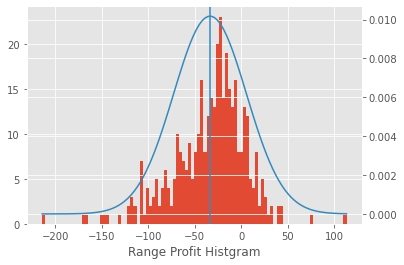

確率変数x=0のときの確率密度(一日で利益が0以上になる確率)： 19.575 %


In [70]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_range['Profit'], bins=100, rwidth=1, )
ax.set_xlabel('Range Profit Histgram')


mu, sigma = DFAnalysdata_range['Profit'].mean(), DFAnalysdata_range['Profit'].std()

X = np.linspace(DFAnalysdata_range['Profit'].min(),DFAnalysdata_range['Profit'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
# norm_pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(X,norm_pdf, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()



#norm_sf = stats.norm.sf(x=X, loc=mu, scale=sigma)
norm_sf = stats.norm.sf(x=0, loc=mu, scale=sigma)*100
print("確率変数x=0のときの確率密度(利益が0以上になる確率)：", norm_sf.round(3), "%")


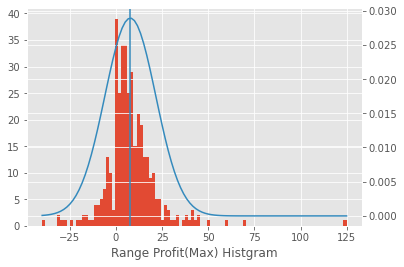

確率変数x=0のときの確率密度(最大利益が0以上になる確率)： 71.321 %


In [71]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_range['Profit(Max)'], bins=100, rwidth=1, )
ax.set_xlabel('Range Profit(Max) Histgram')


mu, sigma = DFAnalysdata_range['Profit(Max)'].mean(), DFAnalysdata_range['Profit(Max)'].std()

X = np.linspace(DFAnalysdata_range['Profit(Max)'].min(),DFAnalysdata_range['Profit(Max)'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
# norm_pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(X,norm_pdf, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()



#norm_sf = stats.norm.sf(x=X, loc=mu, scale=sigma)
norm_sf = stats.norm.sf(x=0, loc=mu, scale=sigma)*100
print("確率変数x=0のときの確率密度(最大利益が0以上になる確率)：", norm_sf.round(3), "%")

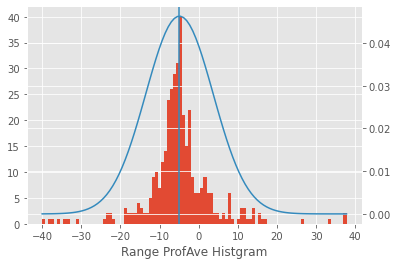

確率変数x=0のときの確率密度(一回のトレードの利益平均が0以上になる確率)： 28.349 %


In [72]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_range['ProfAve'], bins=100, rwidth=1, )
ax.set_xlabel('Range ProfAve Histgram')


mu, sigma = DFAnalysdata_range['ProfAve'].mean(), DFAnalysdata_range['ProfAve'].std()

X = np.linspace(DFAnalysdata_range['ProfAve'].min(),DFAnalysdata_range['ProfAve'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
# norm_pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(X,norm_pdf, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()



#norm_sf = stats.norm.sf(x=X, loc=mu, scale=sigma)
norm_sf = stats.norm.sf(x=0, loc=mu, scale=sigma)*100
print("確率変数x=0のときの確率密度(一回のトレードの利益平均が0以上になる確率)：", norm_sf.round(3), "%")


# Expansion相場の分析

In [19]:
DFAnalysdata_expansion = DFAnalysdata.loc[DFAnalysdata['ExpnLineage'] == "expansion"]

In [20]:
#トレードがなかったデータを削除
DFAnalysdata_expansion = DFAnalysdata_expansion.loc[DFAnalysdata_expansion['NumTrade(Max)'] < 99999]

In [21]:
DFAnalysdata_expansion.head()

,Date,Week,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max),BeforeType,ExpansionType,AfterType,ExpnLineage
1,2010.01.04,Mon,24.4,24.4,0.0,1,1,0,1.000000,24.4000,24.40,0.000000,24.4,0,range,expansion,squeeze,expansion
2,2010.01.05,Tue,-3.3,55.9,-59.2,6,2,4,0.333333,-0.5500,27.95,-14.800000,43.6,6,squeeze,fake inverse expn,squeeze,expansion
3,2010.01.06,Wed,-23.5,37.2,-60.7,5,1,4,0.200000,-4.7000,37.20,-15.175000,37.2,11,squeeze,expansion,range,expansion
4,2010.01.07,Thu,-6.1,40.3,-46.4,4,2,2,0.500000,-1.5250,20.15,-23.200000,38.8,14,range,expansion,squeeze,expansion
5,2010.01.08,Fri,98.3,153.9,-55.6,8,1,7,0.125000,12.2875,153.90,-7.942857,153.9,23,squeeze,range expn,squeeze,expansion


In [22]:
DFAnalysdata_expansion.describe().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
count,586.000,586.000,586.000,586.000,586.000,586.000,586.000,586.000,586.000,586.000,586.000,586.000
mean,13.211,41.998,-28.787,3.991,1.218,2.732,0.474,10.665,35.737,-9.550,39.313,6879.553
std,47.577,37.252,32.065,3.320,0.539,3.322,0.326,23.915,35.085,8.392,36.550,4973.273
min,-208.000,0.000,-233.800,1.000,0.000,0.000,0.000,-36.900,0.000,-50.825,-36.900,0.000
25%,-13.625,15.850,-41.075,2.000,1.000,1.000,0.200,-3.058,12.413,-13.085,14.475,2271.000
50%,12.700,34.700,-20.700,3.000,1.000,2.000,0.400,4.283,26.100,-8.512,32.200,6821.000
75%,37.675,58.450,-4.925,5.000,1.750,4.000,0.667,16.810,47.875,-3.750,54.600,12583.500
max,247.100,279.900,0.000,26.000,3.000,25.000,1.000,200.900,279.900,0.000,279.900,14689.000


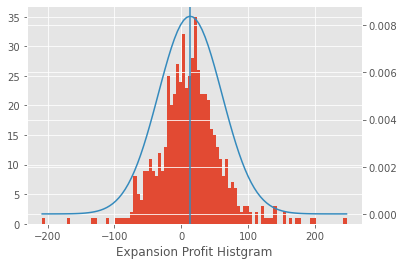

確率変数x=0のときの確率密度(一日で利益が0以上になる確率)： 60.937 %


In [64]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expansion['Profit'], bins=100, rwidth=1, )
ax.set_xlabel('Expansion Profit Histgram')


mu, sigma = DFAnalysdata_expansion['Profit'].mean(), DFAnalysdata_expansion['Profit'].std()

X = np.linspace(DFAnalysdata_expansion['Profit'].min(),DFAnalysdata_expansion['Profit'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
# norm_pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(X,norm_pdf, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()



#norm_sf = stats.norm.sf(x=X, loc=mu, scale=sigma)
norm_sf = stats.norm.sf(x=0, loc=mu, scale=sigma)*100
print("確率変数x=0のときの確率密度(一日で利益が0以上になる確率)：", norm_sf.round(3), "%")


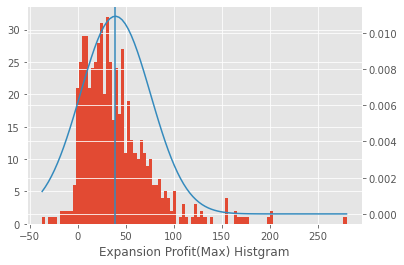

確率変数x=0のときの確率密度(最大利益が0以上になる確率)： 85.895 %


In [69]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expansion['Profit(Max)'], bins=100, rwidth=1, )
ax.set_xlabel('Expansion Profit(Max) Histgram')


mu, sigma = DFAnalysdata_expansion['Profit(Max)'].mean(), DFAnalysdata_expansion['Profit(Max)'].std()

X = np.linspace(DFAnalysdata_expansion['Profit(Max)'].min(),DFAnalysdata_expansion['Profit(Max)'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
# norm_pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(X,norm_pdf, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()



#norm_sf = stats.norm.sf(x=X, loc=mu, scale=sigma)
norm_sf = stats.norm.sf(x=0, loc=mu, scale=sigma)*100
print("確率変数x=0のときの確率密度(最大利益が0以上になる確率)：", norm_sf.round(3), "%")


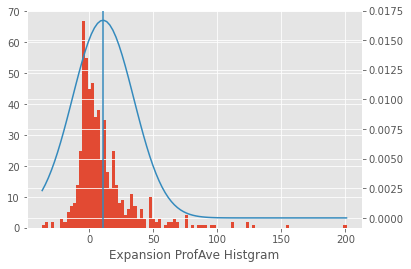

確率変数x=0のときの確率密度(一回のトレードの利益平均が0以上になる確率)： 67.218 %


In [68]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expansion['ProfAve'], bins=100, rwidth=1, )
ax.set_xlabel('Expansion ProfAve Histgram')


mu, sigma = DFAnalysdata_expansion['ProfAve'].mean(), DFAnalysdata_expansion['ProfAve'].std()

X = np.linspace(DFAnalysdata_expansion['ProfAve'].min(),DFAnalysdata_expansion['ProfAve'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
# norm_pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(X,norm_pdf, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()



#norm_sf = stats.norm.sf(x=X, loc=mu, scale=sigma)
norm_sf = stats.norm.sf(x=0, loc=mu, scale=sigma)*100
print("確率変数x=0のときの確率密度(一回のトレードの利益平均が0以上になる確率)：", norm_sf.round(3), "%")


## Expn Range相場の分析

In [26]:
DFAnalysdata_expnrange = DFAnalysdata.query('ExpnLineage == "expn range"')

In [27]:
#トレードがなかったデータを削除
DFAnalysdata_expnrange = DFAnalysdata_expnrange.loc[DFAnalysdata_expnrange['NumTrade(Max)'] < 99999]

In [28]:
DFAnalysdata_expnrange.head()

,Date,Week,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max),BeforeType,ExpansionType,AfterType,ExpnLineage
8,2010.01.13,Wed,-23.4,38.0,-61.4,5,1,4,0.200000,-4.680000,38.00,-15.350000,38.0,36,range,expn range,squeeze,expn range
9,2010.01.14,Thu,-31.2,15.8,-47.0,4,1,3,0.250000,-7.800000,15.80,-15.666667,15.8,40,squeeze,expn range expn,range,expn range
14,2010.01.21,Thu,-95.3,22.2,-117.5,6,1,5,0.166667,-15.883333,22.20,-23.500000,22.2,55,squeeze,expn inverse range,trend,expn range
18,2010.01.27,Wed,-1.1,25.5,-26.6,4,2,2,0.500000,-0.275000,12.75,-13.300000,13.7,76,squeeze,fake expn range,range,expn range
25,2010.02.05,Fri,-41.9,64.7,-106.6,6,2,4,0.333333,-6.983333,32.35,-26.650000,50.4,106,squeeze,expn range,range,expn range


In [29]:
DFAnalysdata_expnrange.describe().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,-0.007,26.607,-26.614,3.862,1.250,2.584,0.449,4.169,20.965,-9.642,23.206,7871.481
std,35.655,25.333,24.465,2.685,0.582,2.683,0.307,16.276,19.019,7.225,22.327,4984.521
min,-108.200,0.000,-132.100,1.000,0.000,0.000,0.000,-53.600,0.000,-53.600,-53.600,36.000
25%,-19.600,10.000,-40.150,2.000,1.000,1.000,0.200,-4.229,8.475,-13.550,9.900,3207.000
50%,-2.000,19.000,-21.650,3.000,1.000,2.000,0.333,-0.517,14.750,-9.167,16.200,7681.000
75%,12.850,35.350,-10.025,5.000,2.000,4.000,0.667,6.425,27.900,-5.481,30.875,12894.250
max,189.600,189.600,0.000,21.000,3.000,20.000,1.000,94.800,108.800,0.000,108.800,14692.000


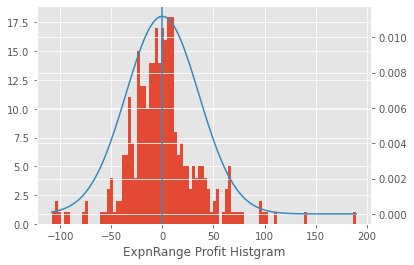

確率変数x=0のときの確率密度(一日で利益が0以上になる確率)： 49.993 %


In [73]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expnrange['Profit'], bins=100, rwidth=1, )
ax.set_xlabel('ExpnRange Profit Histgram')


mu, sigma = DFAnalysdata_expnrange['Profit'].mean(), DFAnalysdata_expnrange['Profit'].std()

X = np.linspace(DFAnalysdata_expnrange['Profit'].min(),DFAnalysdata_expnrange['Profit'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
# norm_pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(X,norm_pdf, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()



#norm_sf = stats.norm.sf(x=X, loc=mu, scale=sigma)
norm_sf = stats.norm.sf(x=0, loc=mu, scale=sigma)*100
print("確率変数x=0のときの確率密度(一日で利益が0以上になる確率)：", norm_sf.round(3), "%")


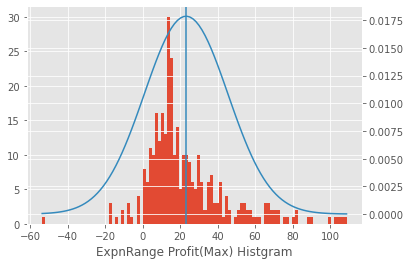

確率変数x=0のときの確率密度(最大利益が0以上になる確率)： 85.069 %


In [74]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expnrange['Profit(Max)'], bins=100, rwidth=1, )
ax.set_xlabel('ExpnRange Profit(Max) Histgram')


mu, sigma = DFAnalysdata_expnrange['Profit(Max)'].mean(), DFAnalysdata_expnrange['Profit(Max)'].std()

X = np.linspace(DFAnalysdata_expnrange['Profit(Max)'].min(),DFAnalysdata_expnrange['Profit(Max)'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
# norm_pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(X,norm_pdf, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()



#norm_sf = stats.norm.sf(x=X, loc=mu, scale=sigma)
norm_sf = stats.norm.sf(x=0, loc=mu, scale=sigma)*100
print("確率変数x=0のときの確率密度(最大利益が0以上になる確率)：", norm_sf.round(3), "%")


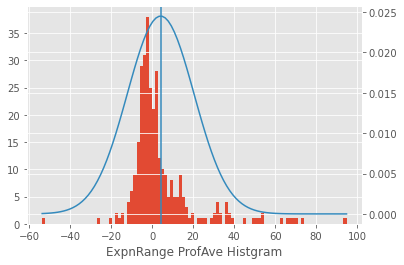

確率変数x=0のときの確率密度(一回のトレードの利益平均が0以上になる確率)： 60.108 %


In [75]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expnrange['ProfAve'], bins=100, rwidth=1, )
ax.set_xlabel('ExpnRange ProfAve Histgram')


mu, sigma = DFAnalysdata_expnrange['ProfAve'].mean(), DFAnalysdata_expnrange['ProfAve'].std()

X = np.linspace(DFAnalysdata_expnrange['ProfAve'].min(),DFAnalysdata_expnrange['ProfAve'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
# norm_pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(X,norm_pdf, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()



#norm_sf = stats.norm.sf(x=X, loc=mu, scale=sigma)
norm_sf = stats.norm.sf(x=0, loc=mu, scale=sigma)*100
print("確率変数x=0のときの確率密度(一回のトレードの利益平均が0以上になる確率)：", norm_sf.round(3), "%")


## 相場タイプ無しの分析

In [32]:
DFAnalysdata_typeNone = DFAnalysdata[DFAnalysdata['ExpnLineage'].isnull()]

In [33]:
DFAnalysdata_typeNone.head()

,Date,Week,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max),BeforeType,ExpansionType,AfterType,ExpnLineage
101,2010.05.24,Mon,162.6,162.6,0.0,2,1,0,0.5,81.3,162.6,0.0,162.6,363,range,NaN,NaN,NaN
102,2010.05.25,Tue,36.9,36.9,0.0,1,1,0,1.0,36.9,36.9,0.0,36.9,364,NaN,NaN,NaN,NaN
103,2010.05.26,Wed,18.6,48.4,-29.8,2,1,1,0.5,9.3,48.4,-29.8,48.4,366,NaN,NaN,NaN,NaN
104,2010.05.27,Thu,61.6,61.6,0.0,2,2,0,1.0,30.8,30.8,0.0,61.2,368,NaN,NaN,NaN,NaN
105,2010.05.28,Fri,-33.2,45.0,-78.2,4,2,2,0.5,-8.3,22.5,-39.1,26.3,372,NaN,NaN,NaN,NaN


## 各相場のまとめ

In [34]:
GBAnalysdata_type = DFAnalysdata.groupby('ExpnLineage')

In [35]:
GBAnalysdata_type.mean().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
ExpnLineage,,,,,,,,,,,,
-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-100.000,99999.000
expansion,12.775,40.612,-27.837,3.860,1.178,2.642,0.458,10.313,34.558,-9.235,34.716,9952.802
expn range,-0.007,26.360,-26.367,3.827,1.238,2.560,0.445,4.130,20.770,-9.553,22.062,8727.155
range,-33.421,10.703,-44.123,5.560,1.096,4.409,0.294,-4.907,7.783,-11.140,7.204,8144.948


In [36]:
GBAnalysdata_type.std().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
ExpnLineage,,,,,,,,,,,,
-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
expansion,46.844,37.393,31.947,3.341,0.573,3.303,0.332,23.594,35.087,8.427,43.728,17352.453
expn range,35.488,25.344,24.485,2.698,0.591,2.682,0.309,16.205,19.037,7.251,25.179,10146.695
range,39.179,13.721,33.860,3.786,0.718,3.961,0.267,8.602,9.003,7.720,15.802,8304.572


In [37]:
GBAnalysdata_type.sum().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
ExpnLineage,,,,,,,,,,,,
-,0.0,0.0,0.0,0,0,0,0.000,0.000,0.000,0.000,-900.0,899991
expansion,7741.5,24610.9,-16869.4,2339,714,1601,277.637,6249.584,20942.067,-5596.362,21037.6,6031398
expn range,-2.1,8514.3,-8516.4,1236,400,827,143.766,1334.029,6708.683,-3085.585,7126.0,2818871
range,-12833.5,4109.8,-16943.3,2135,421,1693,112.910,-1884.450,2988.817,-4277.783,2766.3,3127660


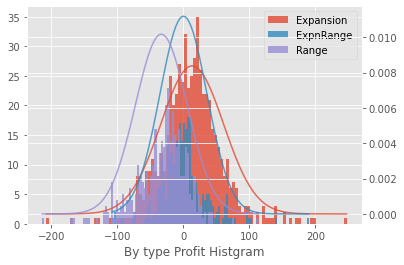

In [88]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax.set_xlabel('By type Profit Histgram')
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expansion['Profit'], bins=100, rwidth=1, alpha=0.8,label='Expansion' )
ax.hist(DFAnalysdata_expnrange['Profit'], bins=100, rwidth=1, alpha=0.8,label='ExpnRange')
ax.hist(DFAnalysdata_range['Profit'], bins=100, rwidth=1, alpha=0.8,label='Range')
# types = ['expansion', 'expn range', 'range']
# for t in types:
#     ax.hist(DFAnalysdata.loc[DFAnalysdata['ExpnLineage'] == t, 'Profit'], bins=100, rwidth=1, alpha=0.8,label=t)


#Expansion
mu, sigma = DFAnalysdata_expansion['Profit'].mean(), DFAnalysdata_expansion['Profit'].std()
X = np.linspace(DFAnalysdata_expansion['Profit'].min(),DFAnalysdata_expansion['Profit'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
ax2.plot(X,norm_pdf, alpha=0.8)


#ExpnRange
mu, sigma = DFAnalysdata_expnrange['Profit'].mean(), DFAnalysdata_expnrange['Profit'].std()
X = np.linspace(DFAnalysdata_expnrange['Profit'].min(),DFAnalysdata_expnrange['Profit'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
ax2.plot(X,norm_pdf, alpha=0.8)


#Range
mu, sigma = DFAnalysdata_range['Profit'].mean(), DFAnalysdata_range['Profit'].std()
X = np.linspace(DFAnalysdata_range['Profit'].min(),DFAnalysdata_range['Profit'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
ax2.plot(X,norm_pdf, alpha=0.8)


ax.legend()
plt.show()

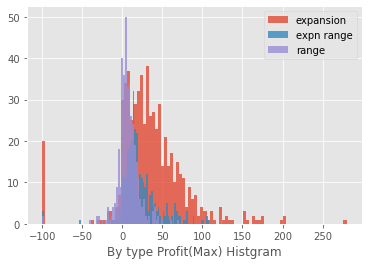

In [39]:
types = ['expansion', 'expn range', 'range']

fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax.set_xlabel('By type Profit(Max) Histgram')

for t in types:
    ax.hist(DFAnalysdata.loc[DFAnalysdata['ExpnLineage'] == t, 'Profit(Max)'], bins=100, rwidth=1, alpha=0.8,label=t)
    

ax.legend()

plt.show()

In [ ]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expansion['Profit'], bins=100, rwidth=1, )
ax.set_xlabel('Expansion Profit Histgram')


mu, sigma = DFAnalysdata_expansion['Profit'].mean(), DFAnalysdata_expansion['Profit'].std()

X = np.linspace(DFAnalysdata_expansion['Profit'].min(),DFAnalysdata_expansion['Profit'].max(),100)
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)
# norm_pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(X,norm_pdf, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()



#norm_sf = stats.norm.sf(x=X, loc=mu, scale=sigma)
norm_sf = stats.norm.sf(x=0, loc=mu, scale=sigma)*100
print("確率変数x=0のときの確率密度(一日で利益が0以上になる確率)：", norm_sf.round(3), "%")
